*This project has a large file size*

Follow these instructions to use LFS on GitHub
- git lfs install
- git lfs track 'data/yelp-reviews.csv'
- git add .gitattributes
- git add data/yelp-reviews.csv
- git commit -m 'Track large file with Git LFS'
- git push origin main

In [1]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

### **Load Data**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
def load_data(file_path):
    df = pd.read_csv(file_path)
    
    return df

file_path = 'data/yelp-reviews.csv'
df = load_data(file_path)
df.head()

,business_id,review_id,date,text,stars,language
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,Lynn and Montecito flowers are simply the best...,5,en
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,Love this place! Always loved the food as they...,5,en
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,We stayed here last weekend with our dog. Its ...,5,en
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,Came here for a quick bite and got the thai sa...,2,en
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,Finally was able to try lunch at Holdren's. M...,2,en


### **EDA**

In [3]:
# EDA
def perform_eda(df):
    missing_values = df.isna().sum()
    
    print(f'Number of missing values: {missing_values}')

perform_eda(df)
df.info()

Number of missing values: business_id    0
review_id      0
date           0
text           0
stars          0
language       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150374 entries, 0 to 150373
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  150374 non-null  object
 1   review_id    150374 non-null  object
 2   date         150374 non-null  object
 3   text         150374 non-null  object
 4   stars        150374 non-null  int64 
 5   language     150374 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.9+ MB


In [4]:
# Summary statistics
statistics = df.describe().T
print('Summary Statistics')
statistics

Summary Statistics


,count,mean,std,min,25%,50%,75%,max
stars,150374.0,4.006045,1.415824,1.0,3.0,5.0,5.0,5.0


### **Data Visualization**

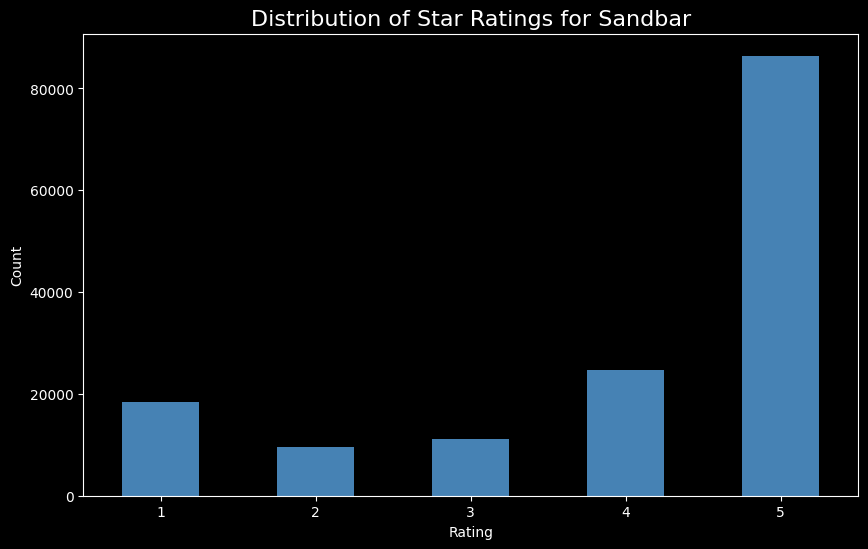

In [5]:
# Dark mode
plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
df['stars'].value_counts().sort_index().plot(kind='bar', color='steelblue')

plt.title('Distribution of Star Ratings for Sandbar', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### **Data Preprocessing**

In [6]:
import re

# Clean text data
def clean_data(df, text_column):
    
    # Remove missing values
    df = df.dropna(subset=[text_column, 'stars'])
    
    # Normalize text data
    df[text_column] = df[text_column].str.lower()
    
    # Remove punctuation and special characters
    df[text_column] = df[text_column].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))
    
    return df

df = clean_data(df, text_column='text')
df.head()

,business_id,review_id,date,text,stars,language
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,lynn and montecito flowers are simply the best...,5,en
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,love this place always loved the food as they ...,5,en
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,we stayed here last weekend with our dog its a...,5,en
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,came here for a quick bite and got the thai sa...,2,en
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,finally was able to try lunch at holdrens my ...,2,en


In [7]:
# Check for NaN/missing values in the text column
missing_text = df['text'].isna().sum()
print(f'Number of missing values in text column: {missing_text}')

Number of missing values in text column: 0


### **Feature Engineering** (Tokenization and Lemmatization)

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# nltk.download('punkt_tab') if not downloaded

# Initialize the stopwords object
stop_words = set(stopwords.words('english'))

# Preprocess text => tokens, remove stopwords and join tokens
def preprocess_text_to_tokens(text):
    
    # Tokeinize text and filter stopwords
    filtered_tokens = [
        word for word in word_tokenize(text.lower()) if word not in stop_words
    ]
    
    # Join the tokens into a string
    return ' '.join(filtered_tokens)

# Create a tokens column and apply preprocessing to the text column and store the results in a tokens column
df['tokens'] = df['text'].apply(preprocess_text_to_tokens)

# Check transformations
df[['text', 'tokens']].head() # return only the text and tokens columns

,text,tokens
0,lynn and montecito flowers are simply the best...,lynn montecito flowers simply best awesome cho...
1,love this place always loved the food as they ...,love place always loved food truly due killer ...
2,we stayed here last weekend with our dog its a...,stayed last weekend dog motel style inside fou...
3,came here for a quick bite and got the thai sa...,came quick bite got thai salad bowl white bean...
4,finally was able to try lunch at holdrens my ...,finally able try lunch holdrens husband ordere...


In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer and stopwords object
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess text => lemmas, remove stopwords and join lemmas
def preprocess_text_to_lemmas(text):
    
    # Lemmatize text and filter stopwords
    lemmas = [
        lemmatizer.lemmatize(word) for word in word_tokenize(text.lower()) if word not in stop_words
    ]
    
    # Join the lemmas into a string
    return ' '.join(lemmas)

# Create a lemmas column and apply preprocessing to the text column and store the results in a lemmas column
df['lemmas'] = df['text'].apply(preprocess_text_to_lemmas)

# Check transformations
df[['text', 'lemmas']].head() # return only the text and lemmas columns

,text,lemmas
0,lynn and montecito flowers are simply the best...,lynn montecito flower simply best awesome choi...
1,love this place always loved the food as they ...,love place always loved food truly due killer ...
2,we stayed here last weekend with our dog its a...,stayed last weekend dog motel style inside fou...
3,came here for a quick bite and got the thai sa...,came quick bite got thai salad bowl white bean...
4,finally was able to try lunch at holdrens my ...,finally able try lunch holdrens husband ordere...


In [10]:
# Display transformed dataframe
df.head()

,business_id,review_id,date,text,stars,language,tokens,lemmas
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,lynn and montecito flowers are simply the best...,5,en,lynn montecito flowers simply best awesome cho...,lynn montecito flower simply best awesome choi...
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,love this place always loved the food as they ...,5,en,love place always loved food truly due killer ...,love place always loved food truly due killer ...
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,we stayed here last weekend with our dog its a...,5,en,stayed last weekend dog motel style inside fou...,stayed last weekend dog motel style inside fou...
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,came here for a quick bite and got the thai sa...,2,en,came quick bite got thai salad bowl white bean...,came quick bite got thai salad bowl white bean...
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,finally was able to try lunch at holdrens my ...,2,en,finally able try lunch holdrens husband ordere...,finally able try lunch holdrens husband ordere...


### **Time Series Preprocessing**
- Create a resampled dataset for time series analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert review dates to datetime objects
def convert_to_datetime(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce') # Convert to datetime, handle errors
    
    return df

# Set the date as the index
def set_date_as_index(df, date_column):
    df.set_index(date_column, inplace=True)
    
    return df

# Resample the data by a specific time interval
def resample_data(df, interval='ME'): # 'M' stands for months, 'D' stands for daily, 'W' for weekly
    df_resampled = df.resample(interval).mean()
    
    return df_resampled

In [12]:
# Reset index if 'date' is currently an index and not a column
df.reset_index(inplace=True)

# Then you can apply your original function to convert 'date' column to datetime
df = convert_to_datetime(df, date_column='date')

# After conversion, set 'date' back as the index
df = set_date_as_index(df, date_column='date')

def resample_numeric_data(df, interval='M'):
    # Select only numeric columns for resampling
    numeric_df = df.select_dtypes(include='number')
    df_resampled = numeric_df.resample(interval).mean()
    return df_resampled

# Check if 'date' is already set as index
if 'date' in df.columns:
    df = set_date_as_index(df, date_column='date')

# Resample numeric data only
df_resampled = resample_numeric_data(df, interval='M')

# Check resampled data
df_resampled.head()

C:\Users\erwin\AppData\Local\Temp\ipykernel_5544\2098222764.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = numeric_df.resample(interval).mean()


,index,stars
date,,
2015-01-31,1348.0,3.936967
2015-02-28,3965.0,3.932598
2015-03-31,6596.5,3.923698
2015-04-30,9346.0,3.962856
2015-05-31,12285.5,3.933677


In [13]:
# Save the dataframe
output_path = 'data/reviews_processed_tsa.csv'
df_resampled.to_csv(output_path)
print(f'Processed dataframed saved to {output_path}')

Processed dataframed saved to data/reviews_processed_tsa.csv


In [14]:
# Load cleaned dataframe
df_resampled = pd.read_csv('data/reviews_processed_tsa.csv', keep_default_na=False)

# Check for missing values
missing_values = df_resampled.isna().sum()
print(f'Number of missing values: {missing_values}')

Number of missing values: date     0
index    0
stars    0
dtype: int64


### **Time Series Analysis**

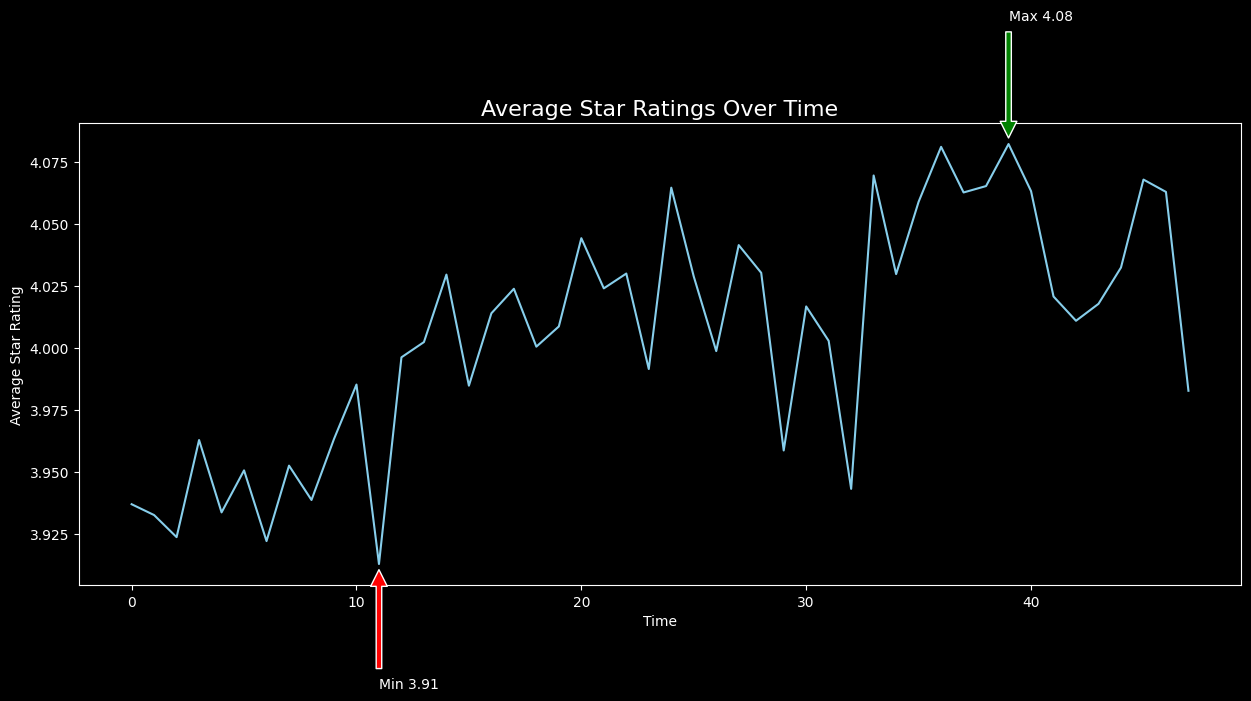

In [15]:
import matplotlib.pyplot as plt

# Annotating the hightest and lowest points
max_value = df_resampled['stars'].max()
min_value = df_resampled['stars'].min()
max_date = df_resampled['stars'].idxmax()
min_date = df_resampled['stars'].idxmin()

plt.figure(figsize=(15, 6))
plt.plot(df_resampled.index, df_resampled['stars'], color='skyblue')
plt.title('Average Star Ratings Over Time', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Average Star Rating')

plt.annotate(f'Max {max_value:.2f}',
             xy=(max_date, max_value),
             xytext=(max_date, max_value + 0.05),
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.annotate(f'Min {min_value:.2f}',
             xy=(min_date, min_value),
             xytext=(min_date, min_value + - 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

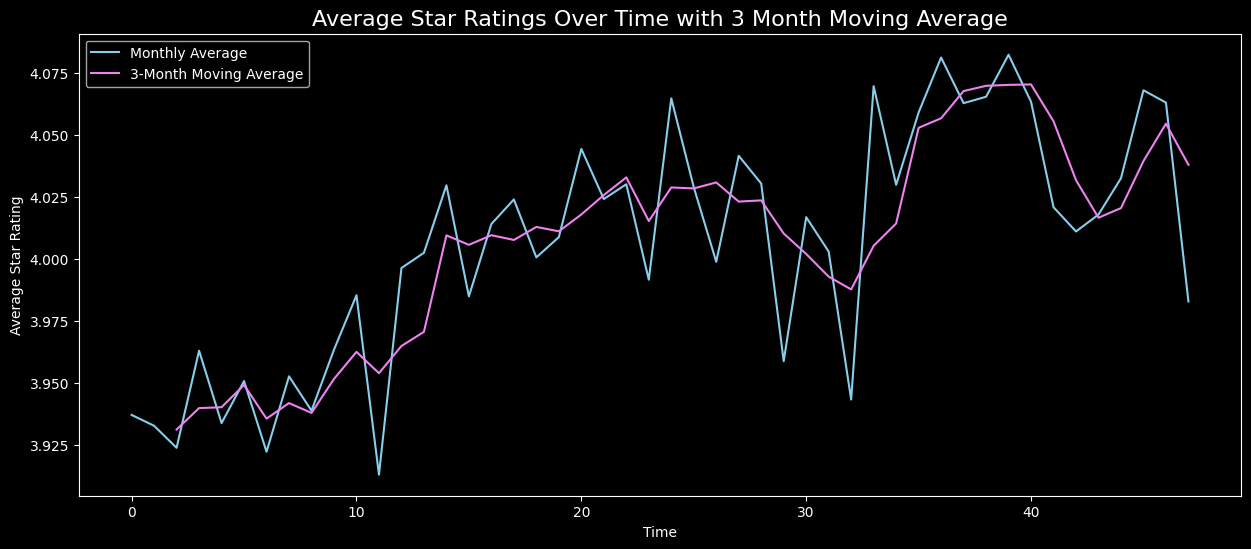

In [16]:
# Calculate 3 month-moving average
df_resampled['3-month-MA'] = df_resampled['stars'].rolling(window=3).mean()

plt.figure(figsize=(15, 6))
plt.plot(df_resampled.index, df_resampled['stars'], label='Monthly Average', color='skyblue')
plt.plot(df_resampled.index, df_resampled['3-month-MA'], label='3-Month Moving Average', color='violet')
plt.title('Average Star Ratings Over Time with 3 Month Moving Average', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Average Star Rating')
plt.legend(loc='best')
plt.show()

### **Deep Learning**
- Data Preparation

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

# Create sequences from the time series data
def create_sequences(data, sequence_length):
    
    sequences = []
    targets = []
    
    # Loop
    for start_index in range(len(data) - sequence_length):
        end_index = start_index + sequence_length
        sequence = data[start_index:end_index]
        target = data[end_index]
        
        sequences.append(sequence)
        targets.append(target)
    
    return np.array(sequences), np.array(targets)

# Sequence length 3 for quarterly, 6 is semi-annual, 12 is for annual
sequence_length = 3 # for 3 months or quarterly
X, y = create_sequences(df_resampled['stars'].values, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#### LSTM Model (Long Short Term Memory) Deep Learning Model

common errors:
- ModuleNotFoundError: No module named 'tensorflow'
- `pip install tensorflow`

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def build_lstm_model(input_shape, units_first_layer, units_second_layer, dropout_first, dropout_second):
    
    # Initialize model
    model = Sequential()
    
    # Add first layer with dropout
    model.add(LSTM(units=units_first_layer, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout_first))
    
    # Add second layer with dropout
    model.add(LSTM(units=units_second_layer, return_sequences=False))
    model.add(Dropout(dropout_second))
    
    # Add output layer
    model.add(Dense(units=1))
    
    return model

# Compile the model
def compile_model(model, optimizer, loss):
    model.compile(optimizer=optimizer, loss=loss)
    
    return model

In [22]:
# Define input shape
input_shape = (X_train.shape[1], 1)

# Build the model
model = build_lstm_model(input_shape, units_first_layer=100, units_second_layer=50, dropout_first=0.5, dropout_second=0.2)

# Compile the model
model = compile_model(model, optimizer='adam', loss='mean_squared_error')

c:\Users\erwin\AppData\Local\pypoetry\Cache\virtualenvs\src-tGtY0oT1-py3.11\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
from tqdm.keras import TqdmCallback

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[TqdmCallback(verbose=1)]
)

Epoch 1/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 15.6689

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 15.6689 - val_loss: 15.2272


Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 14.9318 - val_loss: 14.5825


Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 14.2835

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 14.2835 - val_loss: 13.9408


Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 13.7742 - val_loss: 13.2957


Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.9301

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.9301 - val_loss: 12.6412


Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.2846 - val_loss: 11.9706


Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.7558

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.7558 - val_loss: 11.2799


Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.1741 - val_loss: 10.5652


Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.4603

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.4603 - val_loss: 9.8240


Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 9.9388 - val_loss: 9.0551


Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.1562

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 9.1562 - val_loss: 8.2578


Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8.2320 - val_loss: 7.4345


Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.0982

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.0982 - val_loss: 6.5884


Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 6.9632 - val_loss: 5.7282


Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.3078

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 5.3078 - val_loss: 4.8629


Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 5.0812 - val_loss: 4.0075


Epoch 17/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.1416

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4.1416 - val_loss: 3.1802


Epoch 18/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 3.5878 - val_loss: 2.4024


Epoch 19/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.8674

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 2.8674 - val_loss: 1.6965


Epoch 20/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1.8255 - val_loss: 1.0894


Epoch 21/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.3349

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.3349 - val_loss: 0.6034


Epoch 22/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.8051 - val_loss: 0.2559


Epoch 23/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5178

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.5178 - val_loss: 0.0560


Epoch 24/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3185 - val_loss: 0.0020


Epoch 25/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1238

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1238 - val_loss: 0.0739


Epoch 26/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1958 - val_loss: 0.2371


Epoch 27/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3550

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3550 - val_loss: 0.4438


Epoch 28/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.6247 - val_loss: 0.6316


Epoch 29/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7092

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.7092 - val_loss: 0.7704


Epoch 30/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 1.0655 - val_loss: 0.8242


Epoch 31/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.4705

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 1.4705 - val_loss: 0.7929


Epoch 32/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.1868 - val_loss: 0.7038


Epoch 33/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.9107

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.9107 - val_loss: 0.5837


Epoch 34/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.5345 - val_loss: 0.4583


Epoch 35/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6924

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.6924 - val_loss: 0.3336


Epoch 36/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3150 - val_loss: 0.2266


Epoch 37/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3234

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3234 - val_loss: 0.1402


Epoch 38/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1778 - val_loss: 0.0790


Epoch 39/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3032

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3032 - val_loss: 0.0361


Epoch 40/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1665 - val_loss: 0.0112


Epoch 41/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1925

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1925 - val_loss: 0.0016


Epoch 42/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1539 - val_loss: 0.0044


Epoch 43/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3038

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3038 - val_loss: 0.0158


Epoch 44/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2709 - val_loss: 0.0308


Epoch 45/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1847

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1847 - val_loss: 0.0471


Epoch 46/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2342 - val_loss: 0.0608


Epoch 47/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2304

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2304 - val_loss: 0.0705


Epoch 48/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2056 - val_loss: 0.0761


Epoch 49/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2483

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.2483 - val_loss: 0.0764


Epoch 50/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2631 - val_loss: 0.0718


Epoch 51/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2077

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2077 - val_loss: 0.0640


Epoch 52/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2028 - val_loss: 0.0539


Epoch 53/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2659

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2659 - val_loss: 0.0425


Epoch 54/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1443 - val_loss: 0.0319


Epoch 55/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1017

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1017 - val_loss: 0.0230


Epoch 56/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3058 - val_loss: 0.0149


Epoch 57/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2208 - val_loss: 0.0077


Epoch 58/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1181

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1181 - val_loss: 0.0033


Epoch 59/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1179 - val_loss: 0.0014


Epoch 60/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1819

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1819 - val_loss: 0.0018


Epoch 61/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1321 - val_loss: 0.0037


Epoch 62/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1495

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1495 - val_loss: 0.0068


Epoch 63/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1013 - val_loss: 0.0097


Epoch 64/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1180 - val_loss: 0.0128


Epoch 65/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1824

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1824 - val_loss: 0.0160


Epoch 66/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1936 - val_loss: 0.0192


Epoch 67/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1964

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1964 - val_loss: 0.0201


Epoch 68/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1574 - val_loss: 0.0192


Epoch 69/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1377 - val_loss: 0.0182


Epoch 70/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1288

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1288 - val_loss: 0.0164


Epoch 71/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1410 - val_loss: 0.0143


Epoch 72/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1175 - val_loss: 0.0122


Epoch 73/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1591

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1591 - val_loss: 0.0108


Epoch 74/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1221 - val_loss: 0.0084


Epoch 75/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1256 - val_loss: 0.0068


Epoch 76/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1721

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1721 - val_loss: 0.0054


Epoch 77/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1354 - val_loss: 0.0042


Epoch 78/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1966

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1966 - val_loss: 0.0034


Epoch 79/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1048 - val_loss: 0.0028


Epoch 80/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1244

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1244 - val_loss: 0.0024


Epoch 81/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1406 - val_loss: 0.0017


Epoch 82/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1860 - val_loss: 0.0014


Epoch 83/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1314

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1314 - val_loss: 0.0014


Epoch 84/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.1743 - val_loss: 0.0017


Epoch 85/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2397

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2397 - val_loss: 0.0020


Epoch 86/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1590 - val_loss: 0.0021


Epoch 87/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2456

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2456 - val_loss: 0.0020


Epoch 88/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2380 - val_loss: 0.0018


Epoch 89/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1038

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1038 - val_loss: 0.0016


Epoch 90/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1575 - val_loss: 0.0014


Epoch 91/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1236

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1236 - val_loss: 0.0014


Epoch 92/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1778 - val_loss: 0.0013


Epoch 93/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1009

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1009 - val_loss: 0.0014


Epoch 94/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1927 - val_loss: 0.0015


Epoch 95/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1705

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1705 - val_loss: 0.0016


Epoch 96/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0922 - val_loss: 0.0018


Epoch 97/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1524

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1524 - val_loss: 0.0020


Epoch 98/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1989 - val_loss: 0.0022


Epoch 99/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1555

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1555 - val_loss: 0.0026


Epoch 100/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1346 - val_loss: 0.0028




100%|██████████| 100/100 [00:08<00:00, 12.10epoch/s, loss=0.135, val_loss=0.00282]


### **Model Evaluation**

In [24]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# def evaluate_model(model, X_test, y_test):
    
#     test_loss = model.evaluate(X_test, y_test)
#     print(f'Test Loss: {test_loss}')
    
#     return test_loss

# def calculate_metrics(y_test, predictions):
#     mse = mean_squared_error(y_test, predictions)
#     mae = mean_absolute_error(y_test, predictions)
    
#     print(f'Mean Squared Error: {mse}')
#     print(f'Mean Absolute Error: {mae}')
    
#     return mse, mae

# def predict_and_evaluate(model, X_test, y_test):
    
#     # Evaluate model
#     test_loss = evaluate_model(model, X_test, y_test)
#     predictions = model.predict(X_test)
    
#     # Calculate metrics
#     mse, mae = calculate_metrics(y_test, predictions)
    
#     return predictions, mse, mae

# predictions, mse, mae = predict_and_evaluate(model, X_test, y_test)

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss}')
    
    return test_loss

def calculate_metrics(y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    
    return mse, mae

def predict_and_evaluate(model, X_test, y_test):
    
    # Evaluate model
    test_loss = evaluate_model(model, X_test, y_test)
    predictions = model.predict(X_test)
    
    # Calculate metrics
    mse, mae = calculate_metrics(y_test, predictions)
    
    return predictions, mse, mae

predictions, mse, mae = predict_and_evaluate(model, X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0038
Test Loss: 0.0037931720726191998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
Mean Squared Error: 0.0037931625744557895
Mean Absolute Error: 0.05200779044502779


LSTM Model Performance


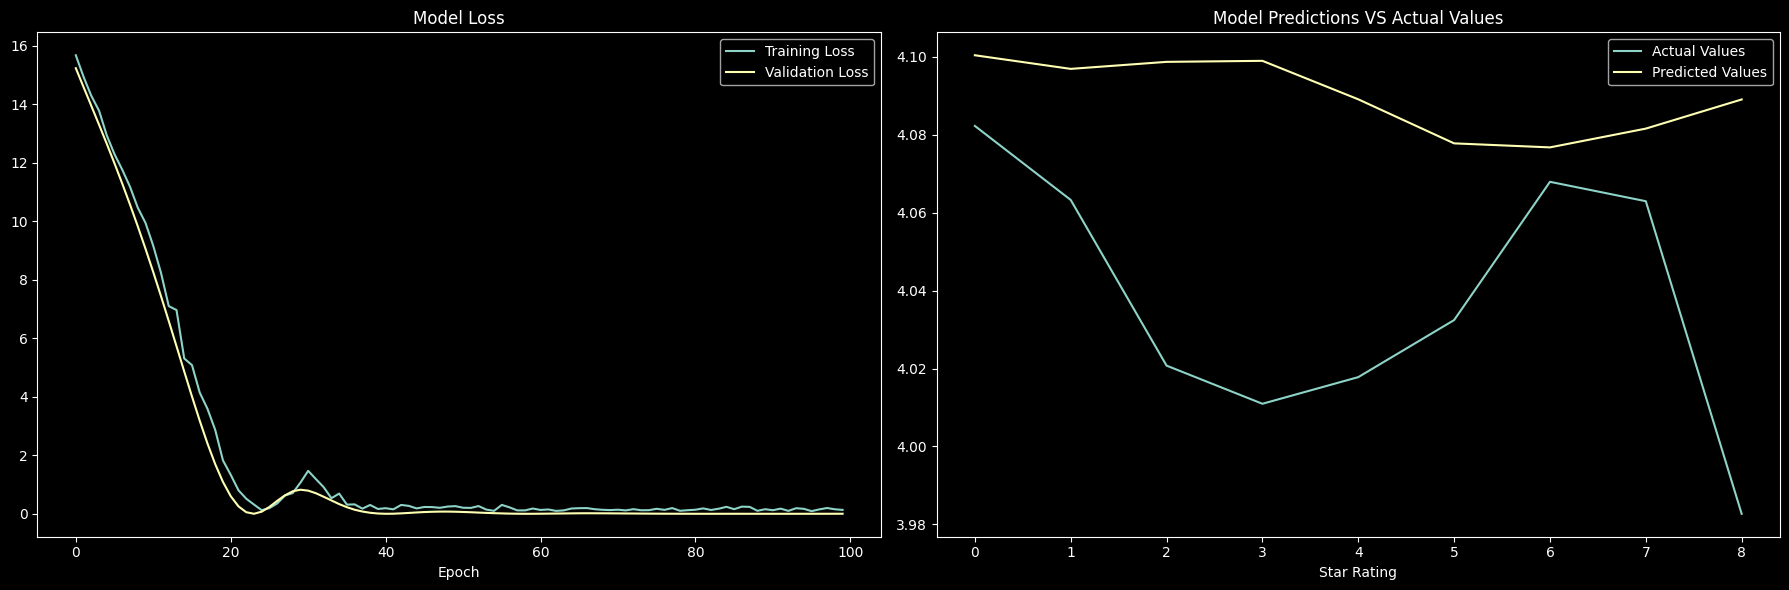

In [25]:
import matplotlib.pyplot as plt

def plot_training_and_predictions(history, y_test, predictions):
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Training and validation loss
    axes[0].plot(history.history['loss'], label='Training Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_title('Model Loss')
    axes[0].set_xlabel('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].legend()
    
    # Prediction VS Actual Values
    axes[1].plot(y_test, label='Actual Values')
    axes[1].plot(predictions, label='Predicted Values')
    axes[1].set_title('Model Predictions VS Actual Values')
    axes[1].set_xlabel('Time')
    axes[1].set_xlabel('Star Rating')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
print('LSTM Model Performance')
plot_training_and_predictions(history, y_test, predictions)